## Jayden Yap p2112790 CA1 Part C (Classification)

In [5]:
#dependencies
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,f1_score,recall_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt

In [6]:
#import dataset
df=pd.read_csv('data/heart.csv')
display(df.head(3))
display(df.tail(3))
print(df.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [7]:
#Check for null values
print(pd.isnull(df).sum())
print(f"Total rows with null values: {df.isnull().any(axis=1).sum()}")

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Total rows with null values: 0


In [9]:
#dictionary to store accuracy scores
scoreList={}
#split data
X=df.drop('output',axis=1)
y=df['output']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y
                                                    ,random_state=1 #fixed splits
                                                    )

0.8333333333333334


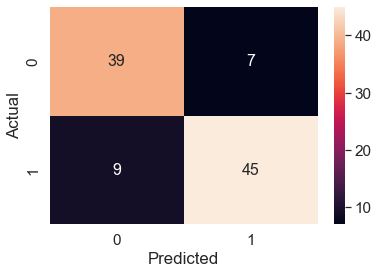

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        46
           1       0.87      0.83      0.85        54

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [13]:
#trying random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
#scoring
accuracy=recall_score(y_test,y_pred)
print(accuracy)
scoreList['RandomForest']=accuracy
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.4) # for label size
ax=sns.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
ax.set(xlabel='Predicted',ylabel='Actual')
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.7222222222222222


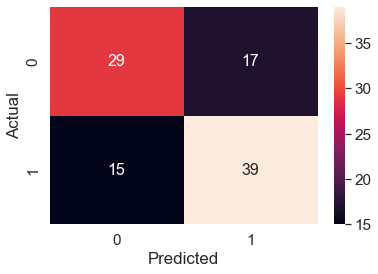

              precision    recall  f1-score   support

           0       0.66      0.63      0.64        46
           1       0.70      0.72      0.71        54

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [12]:
#trying kneighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
#scoring
accuracy=recall_score(y_test,y_pred)
print(accuracy)
scoreList['KNN']=accuracy
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.4) # for label size
ax=sns.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
ax.set(xlabel='Predicted',ylabel='Actual')
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#Actually bad results with KNN, oversampling should improve